![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [ ]:
# Exportar modelo
import joblib

# Creación de API
from flask import Flask
#from flask_restx import Api, Resource, fields
import sys
import os

from sklearn.preprocessing import MinMaxScaler


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np

In [ ]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [ ]:
dataTraining.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'popularity'],
      dtype='object')

In [ ]:
dataTesting.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

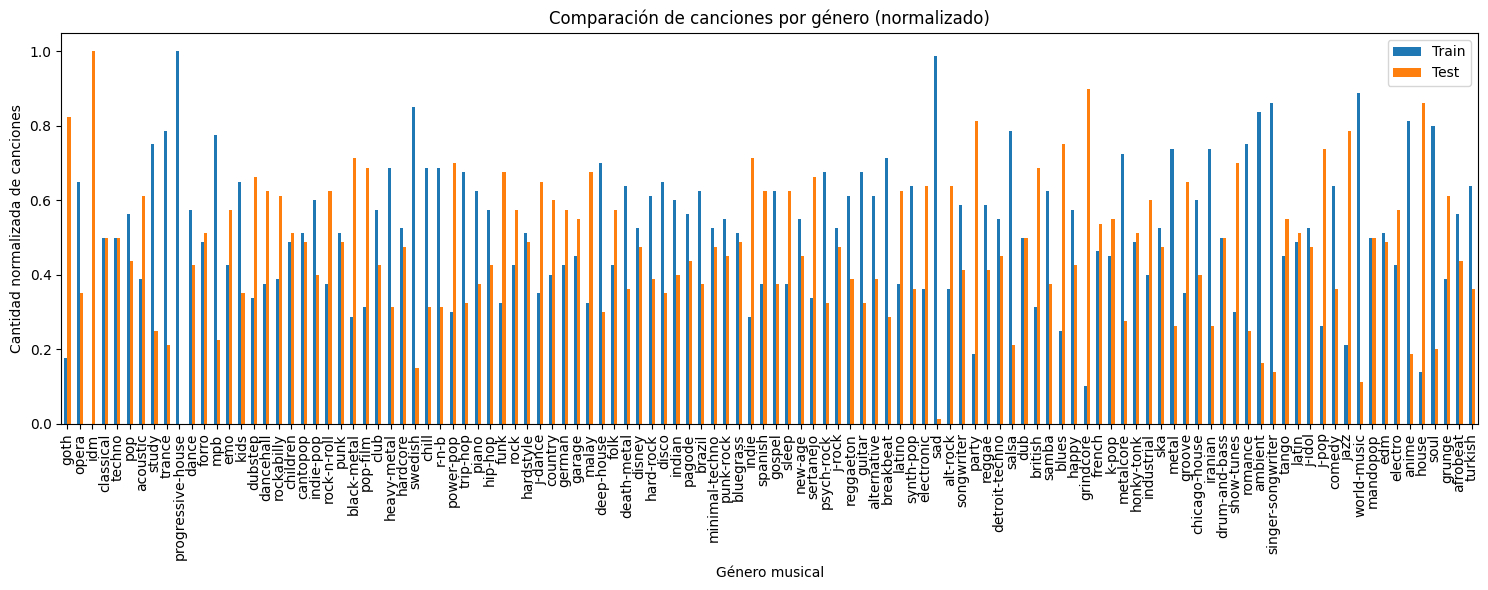

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lista de géneros únicos (en ambos datasets por seguridad)
all_genres = pd.concat([dataTraining["track_genre"], dataTesting["track_genre"]]).dropna().unique()

# Conteo total de canciones por género en cada conjunto
train_counts = dataTraining["track_genre"].value_counts().reindex(all_genres, fill_value=0)
test_counts = dataTesting["track_genre"].value_counts().reindex(all_genres, fill_value=0)

# Crear DataFrame combinado
c = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
})

# Normalizar ambos conjuntos por separado
d = pd.DataFrame({
    "Train": MinMaxScaler().fit_transform(c[["Train"]])[:, 0],
    "Test": MinMaxScaler().fit_transform(c[["Test"]])[:, 0]
}, index=c.index)

# Graficar comparación por género
d.plot(kind="bar", figsize=(15, 6), title="Comparación de canciones por género (normalizado)")
plt.ylabel("Cantidad normalizada de canciones")
plt.xlabel("Género musical")
plt.tight_layout()
plt.show()


La Comparación de canciones por artista  es muy grande, debe realizarse transformacion de estas variables asi como la de valence creando rangos.

In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

Popularity
0   37.454012
1   95.071431
2   73.199394
3   59.865848
4   15.601864

PREPROCESAMENTO DE DATOS

In [ ]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence           79800 non-null  float6

In [ ]:
dataTraining.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
popularity          0
dtype: int64

In [ ]:
dataTraining['track_id'].duplicated().sum()

np.int64(13080)

In [ ]:
dataTraining['artists'].unique().sum()

'Love and RocketsFilippa GiordanoSusumu YokotaFranz Liszt;YUNDIScooterBTSRosie Thomas;The Shins;Sufjan Stevens;Josh OttumSarah, the IllstrumentalistWaveumDj T.H.;MitrazSeven Lions;Blastoyz;FioraBurna Boy;Blxst;KehlaniIsraell Muniz;Wesley SafadãoCapital InicialXXXTENTACIONUM44K;Luan OttenRik GaynorZeds Dead;Subtronics;FlowdanBusy Signal;Oh GoshTHE MODSCanciones Infantiles;Musica Infantil;Rondas Infantilesmy little airportHasan Raheem;Abdullah Kasumbi;Talhah YunusEnrique GuzmanMy Chemical RomanceDissectionA.R. Rahman;Sid Sriram;Issrath QuadhriDJ Flex;Kyle EdwardsThe Bad KidsRicardo IorioThug LifeFirst Aid KitSPEECHLESS;Ryan Celsius SoundsFlora MatosEason ChanHoodoo GurusKinobe;Stephen HagueSkylar GreyDaddy Yankee;Natti Natasha;Becky G;Bad BunnyNever Ending GameJames BrownDominguinhosOasisBuren Van De BrandweerSHINJIRO ATAE (from AAA)Jake OwenMelormanK.I.ZCASTLEBEATKotiteollisuusIn FlamesNamewee;Leehom WangY.V.E. 48Iron & WineOrbit CultureKristen BellDead FishSkyyTwin StringsRandall KingB

No hay datos nulos, por lo tanto no es necesarioefectuar tratamiento de estos.

track_id, track_name, album_name no parecen aportar valor predictivo directo, por lo tanto se procede a elminarlos.
La columna artists tampoco aporta valor predictivo, ya que no se dispone de datos de popularida de los artistas. por lo tanto también se elimina

Siguiente paso convertir la variables categóricas a numéricas para entrenar modelos de regresión.

In [ ]:
# 1. Eliminar columnas no útiles para predicción
#, 'artists
dataTraining = dataTraining.drop(columns=['Unnamed: 0', 'track_id', 'album_name', 'track_name'])

In [ ]:
#dataTraining = dataTraining.drop(columns=['Unnamed: 0'])#, 'track_id', 'album_name', 'track_name'])

In [ ]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration_ms          79800 non-null  int64  
 1   explicit             79800 non-null  int64  
 2   danceability         79800 non-null  float64
 3   energy               79800 non-null  float64
 4   key                  79800 non-null  int64  
 5   loudness             79800 non-null  float64
 6   mode                 79800 non-null  int64  
 7   speechiness          79800 non-null  float64
 8   acousticness         79800 non-null  float64
 9   instrumentalness     79800 non-null  float64
 10  liveness             79800 non-null  float64
 11  valence              79800 non-null  float64
 12  tempo                79800 non-null  float64
 13  time_signature       79800 non-null  int64  
 14  popularity           79800 non-null  int64  
 15  track_genre_encoded  79800 non-null 

In [ ]:
# 2. Convertir 'explicit' a numérico
dataTraining['explicit'] = dataTraining['explicit'].astype(int)

In [ ]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  int64  
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence           79800 non-null  float6

Convertir la columna track_genre a valores numéricos manteniendo una sola columna, para esto lo ideal es usar Label Encoding, que asigna un número entero único a cada categoría y evitamos la creación de muchas otras columnas.

In [ ]:
# 3. Convertir 'track_genre' con Label Encoder para mantener una sola columna
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataTraining['track_genre_encoded'] = le.fit_transform(dataTraining['track_genre'])
#dataTraining['artists'] = le.fit_transform(dataTraining['artists'])
#dataTraining['album_name'] = le.fit_transform(dataTraining['album_name'])
#dataTraining['track_name'] = le.fit_transform(dataTraining['track_name'])


In [ ]:
#dataTraining['track_id'] = le.fit_transform(dataTraining['track_id'])

In [ ]:
#dataTraining['track_id'].unique()

array([64239, 50962, 60021, ...,  4555, 21454, 32559])

In [ ]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           79800 non-null  int64  
 1   track_id             79800 non-null  object 
 2   artists              79800 non-null  int64  
 3   album_name           79800 non-null  object 
 4   track_name           79800 non-null  object 
 5   duration_ms          79800 non-null  int64  
 6   explicit             79800 non-null  int64  
 7   danceability         79800 non-null  float64
 8   energy               79800 non-null  float64
 9   key                  79800 non-null  int64  
 10  loudness             79800 non-null  float64
 11  mode                 79800 non-null  int64  
 12  speechiness          79800 non-null  float64
 13  acousticness         79800 non-null  float64
 14  instrumentalness     79800 non-null  float64
 15  liveness             79800 non-null 

In [ ]:
dataTraining = dataTraining.drop(columns=['track_genre'])
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           79800 non-null  int64  
 1   track_id             79800 non-null  object 
 2   artists              79800 non-null  object 
 3   album_name           79800 non-null  object 
 4   track_name           79800 non-null  object 
 5   duration_ms          79800 non-null  int64  
 6   explicit             79800 non-null  int64  
 7   danceability         79800 non-null  float64
 8   energy               79800 non-null  float64
 9   key                  79800 non-null  int64  
 10  loudness             79800 non-null  float64
 11  mode                 79800 non-null  int64  
 12  speechiness          79800 non-null  float64
 13  acousticness         79800 non-null  float64
 14  instrumentalness     79800 non-null  float64
 15  liveness             79800 non-null 

# Visualización de la matriz cde correlaciones

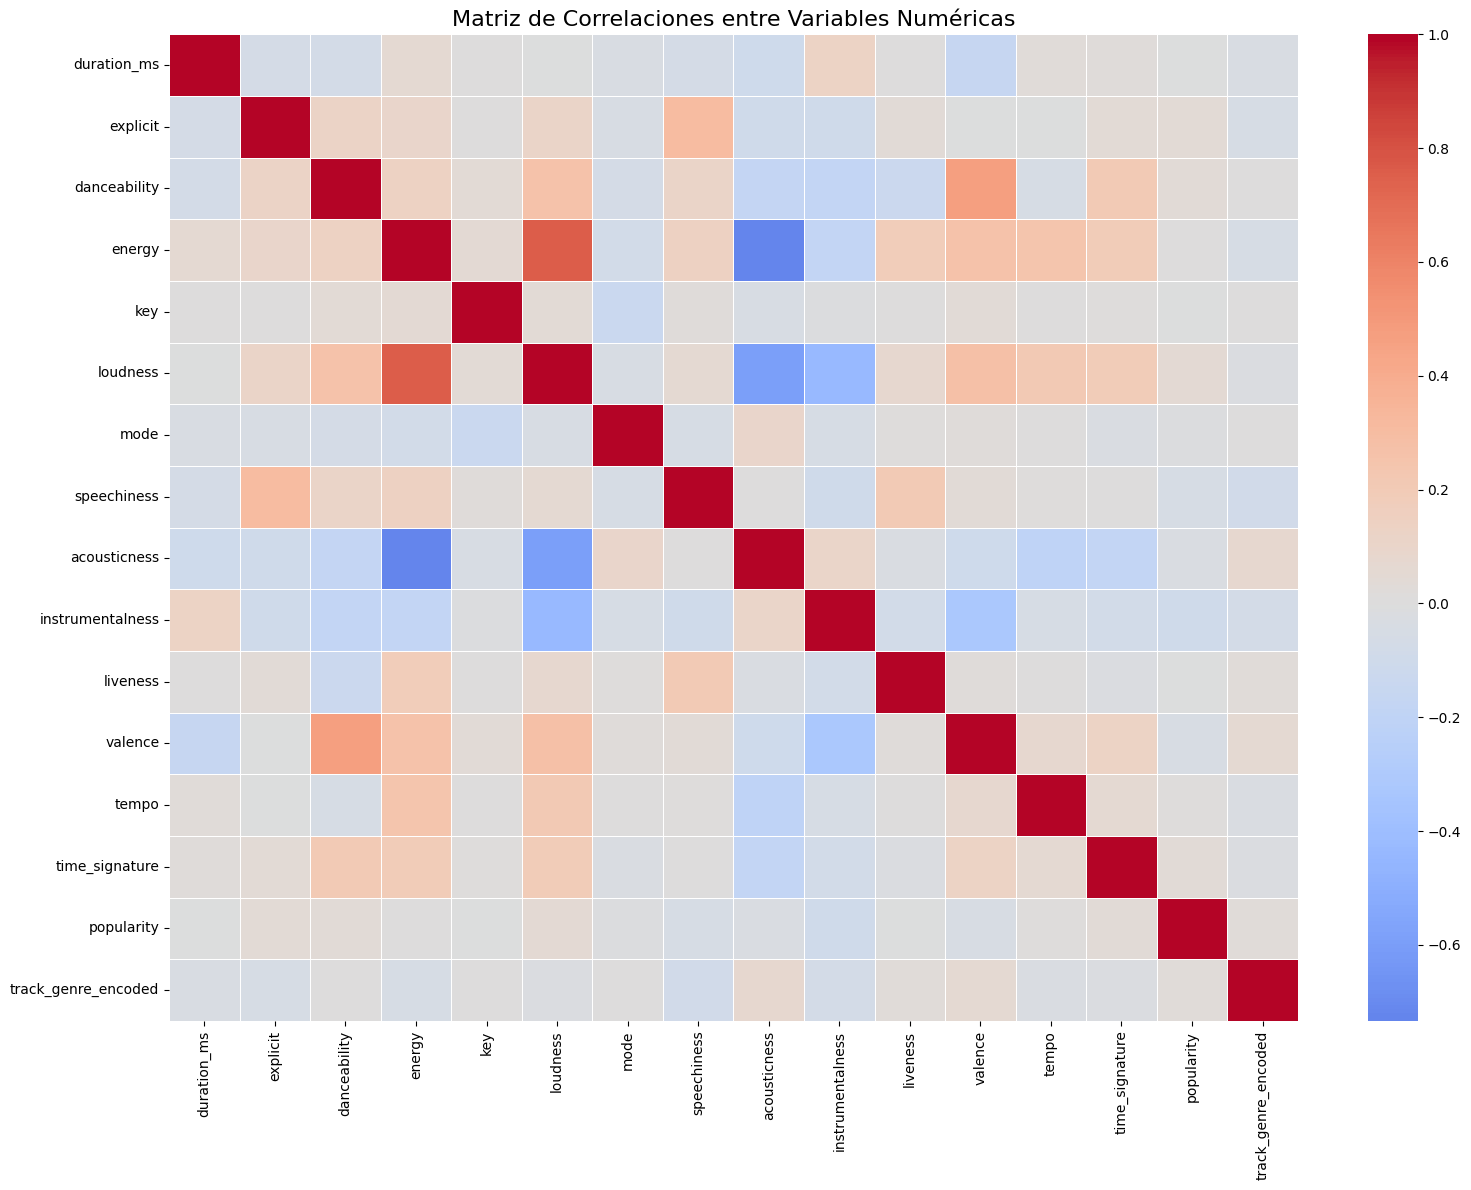

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
numeric_data = dataTraining.select_dtypes(include=['int32', 'int64', 'float64', 'bool'])

# Calcular la matriz de correlaciones
correlation_matrix = numeric_data.corr()

# Visualizar con un mapa de calor
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, center=0, linewidths=0.5)
plt.title('Matriz de Correlaciones entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Repetimos procedimiento para Datos de prueba

In [ ]:
dataTesting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34200 entries, 0 to 34199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          34200 non-null  object 
 1   artists           34199 non-null  object 
 2   album_name        34199 non-null  object 
 3   track_name        34199 non-null  object 
 4   duration_ms       34200 non-null  int64  
 5   explicit          34200 non-null  bool   
 6   danceability      34200 non-null  float64
 7   energy            34200 non-null  float64
 8   key               34200 non-null  int64  
 9   loudness          34200 non-null  float64
 10  mode              34200 non-null  int64  
 11  speechiness       34200 non-null  float64
 12  acousticness      34200 non-null  float64
 13  instrumentalness  34200 non-null  float64
 14  liveness          34200 non-null  float64
 15  valence           34200 non-null  float64
 16  tempo             34200 non-null  float64
 17

In [ ]:
# 1. Eliminar columnas no útiles para predicción
#, 'artists'
dataTesting = dataTesting.drop(columns=[ 'track_id', 'album_name', 'track_name','artists'])
# 2. Convertir 'explicit' a numérico
dataTesting['explicit'] = dataTesting['explicit'].astype(int)
# 3. Convertir 'track_genre' con Label Encoder para mantener una sola columna
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataTesting['track_genre_encoded'] = le.fit_transform(dataTesting['track_genre'])
#dataTesting['artists'] = le.fit_transform(dataTesting['artists'])
#dataTesting['album_name'] = le.fit_transform(dataTesting['album_name'])
#dataTesting['track_name'] = le.fit_transform(dataTesting['track_name'])
#dataTesting['track_id'] = le.fit_transform(dataTesting['track_id'])
dataTesting = dataTesting.drop(columns=['track_genre'])
dataTesting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34200 entries, 0 to 34199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration_ms          34200 non-null  int64  
 1   explicit             34200 non-null  int64  
 2   danceability         34200 non-null  float64
 3   energy               34200 non-null  float64
 4   key                  34200 non-null  int64  
 5   loudness             34200 non-null  float64
 6   mode                 34200 non-null  int64  
 7   speechiness          34200 non-null  float64
 8   acousticness         34200 non-null  float64
 9   instrumentalness     34200 non-null  float64
 10  liveness             34200 non-null  float64
 11  valence              34200 non-null  float64
 12  tempo                34200 non-null  float64
 13  time_signature       34200 non-null  int64  
 14  track_genre_encoded  34200 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 4.2

In [ ]:
def cat_col_popularity(c):
    # Agrupamos por la columna categórica y calculamos min, mediana y max de Popularity
    m = dataTraining.groupby(c).agg({"popularity": ["min", "median", "max"]}).reset_index()
    m.columns = [c, "min", "median", "max"]

    # Calculamos el rango de Popularity
    m["range"] = m["max"] - m["min"]

    # Creamos categorías basadas en rangos de 'range' y 'median'
    for i in ["range", "median"]:
        mn = min(m[i])
        mm = max(m[i]) + 1
        steps = int((mm - mn) / 9) if (mm - mn) >= 9 else 1  # Evitamos que el paso sea 0
        r = np.arange(mn, mm, steps)
        l = list(range(0, len(r) - 1))
        m[c + "_" + i] = pd.cut(m[i], r, labels=l, include_lowest=True)

    return m[[c, c + "_range", c + "_median"]]


In [ ]:
track_id = cat_col_popularity("track_id")

In [ ]:
# generación de archivos csv con los agrupadores realizados, de manera que puedan ser consultados por el API

track_id.to_csv('track_id.csv', index=False)

In [ ]:
dataTraining = dataTraining.join(track_id.set_index("track_id"), on="track_id")

In [ ]:
dataTesting = dataTesting.join(track_id.set_index("track_id"), on="track_id")

In [ ]:
train_dumm = pd.get_dummies(dataTraining.select_dtypes(include=['category']), dummy_na=True).astype(int)
test_dumm = pd.get_dummies(dataTesting.select_dtypes(include=['category']), dummy_na=True).astype(int)

In [ ]:
dataTraining = dataTraining.join(train_dumm)
dataTesting = dataTesting.join(test_dumm)

In [ ]:
dataTesting = dataTesting.fillna(0)

In [ ]:
dataTraining = dataTraining.fillna(0)

In [ ]:
dataTraining = dataTraining.drop(columns=['track_genre'])
#dataTesting = dataTesting.drop(columns=['track_genre'])

KeyError: "['track_genre'] not found in axis"

In [ ]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           79800 non-null  int64  
 1   track_id             79800 non-null  object 
 2   album_name           79800 non-null  object 
 3   track_name           79800 non-null  object 
 4   duration_ms          79800 non-null  int64  
 5   explicit             79800 non-null  int64  
 6   danceability         79800 non-null  float64
 7   energy               79800 non-null  float64
 8   key                  79800 non-null  int64  
 9   loudness             79800 non-null  float64
 10  mode                 79800 non-null  int64  
 11  speechiness          79800 non-null  float64
 12  acousticness         79800 non-null  float64
 13  instrumentalness     79800 non-null  float64
 14  liveness             79800 non-null  float64
 15  valence              79800 non-null 

In [ ]:
dataTraining = dataTraining.drop(columns=['artists'])
dataTraining = dataTraining.drop(columns=['artists'])

## ELECCION DE MODELO:

Usaremos los siguientes modelo para comparar y escoger el de mejor comportamiento
- Regresión lineal
- Bagging
- Arbol de decisión
- Random Forest
- XGBoost
- SVR
- Stacking

# Regresión lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = dataTraining.drop(columns=['popularity'])  # Todas menos la columna objetivo
y = dataTraining['popularity']

# 2. Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = modelo_lr.predict(X_val)

# 5. Evaluar el modelo
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# 6. Mostrar resultados
print(" Evaluación del modelo de Regresión Lineal:")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")


 Evaluación del modelo de Regresión Lineal:
R² (Coeficiente de determinación): 0.0247
MAE (Error absoluto medio): 18.30
RMSE (Raíz del error cuadrático medio): 21.96


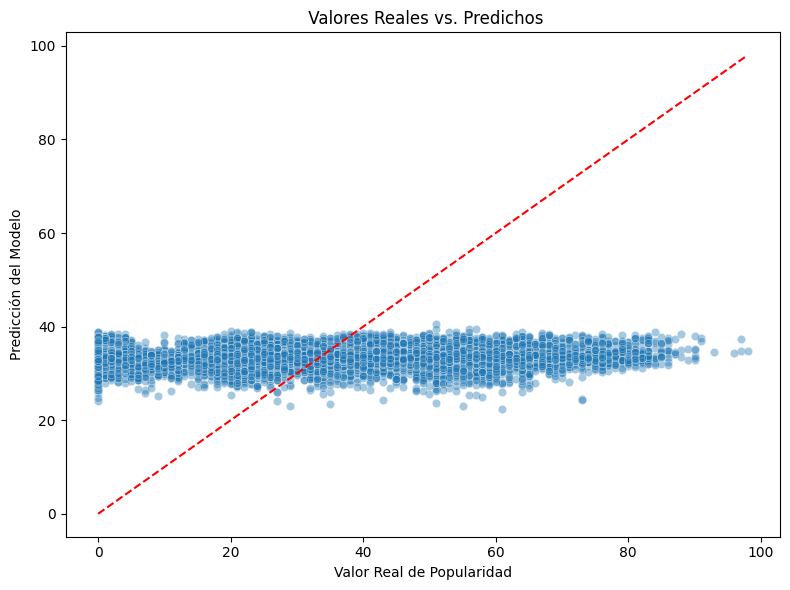

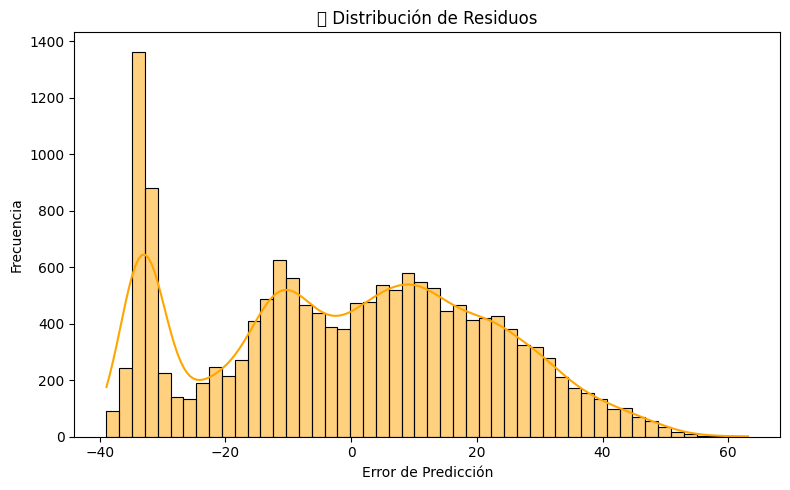

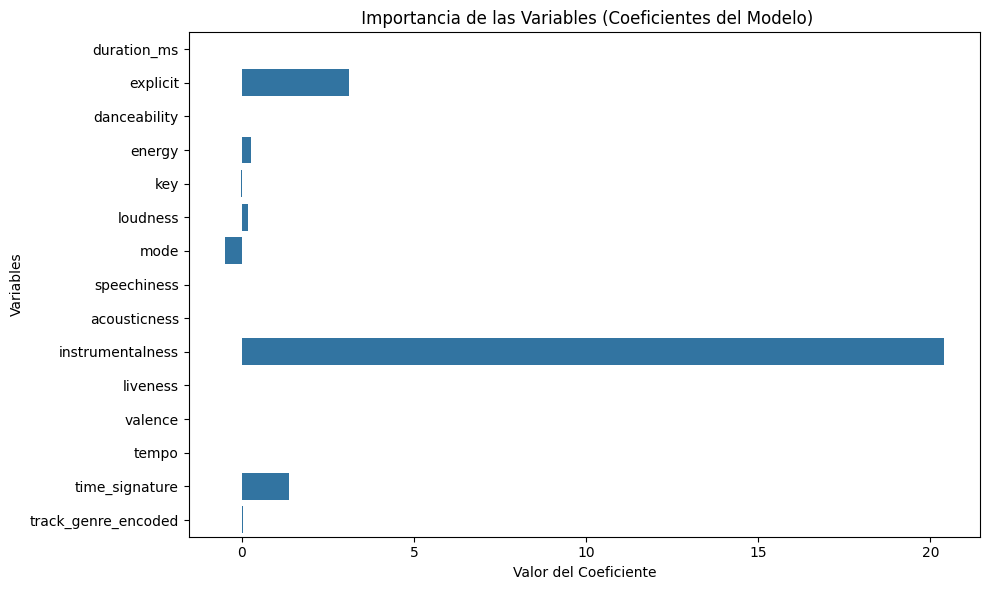

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción del Modelo")
plt.title(" Valores Reales vs. Predichos")
plt.tight_layout()
plt.show()

# 2. Distribución de residuos (errores)
residuos = y_val - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=50, kde=True, color='orange')
plt.title("📉 Distribución de Residuos")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Importancia de variables (coeficientes)
coeficientes = modelo_lr.coef_
nombres_variables = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coeficientes, y=nombres_variables)
plt.title(" Importancia de las Variables (Coeficientes del Modelo)")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


R² = 0.0247 significa que el modelo solo está explicando el 2.47% de la variabilidad en la popularidad de las canciones.

Eso es muy bajo, lo cual sugiere que:

El modelo no está capturando bien la relación entre las variables predictoras y la popularidad.

Puede haber factores externos importantes que no están en el dataset, como: Marketing de la canción, Influencia del artista, Redes sociales, virales, fechas de lanzamiento, etc.

La relación podría no ser lineal, por lo que un modelo más complejo como árboles, Random Forest, o redes neuronales podría funcionar mejor.

# ARBOL DE DECISION

In [ ]:
#Arbol de decision
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Crear y entrenar el árbol de decisión
arbol_modelo = DecisionTreeRegressor(random_state=42, max_depth=None)
arbol_modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred_arbol = arbol_modelo.predict(X_val)

# Evaluar el modelo
r2_arbol = r2_score(y_val, y_pred_arbol)
mae_arbol = mean_absolute_error(y_val, y_pred_arbol)
rmse_arbol = np.sqrt(mean_squared_error(y_val, y_pred_arbol))

print("Evaluación del modelo Árbol de Decisión:")
print(f"R²: {r2_arbol:.4f}")
print(f"MAE: {mae_arbol:.2f}")
print(f"RMSE: {rmse_arbol:.2f}")


Evaluación del modelo Árbol de Decisión:
R²: -0.0489
MAE: 14.51
RMSE: 22.77


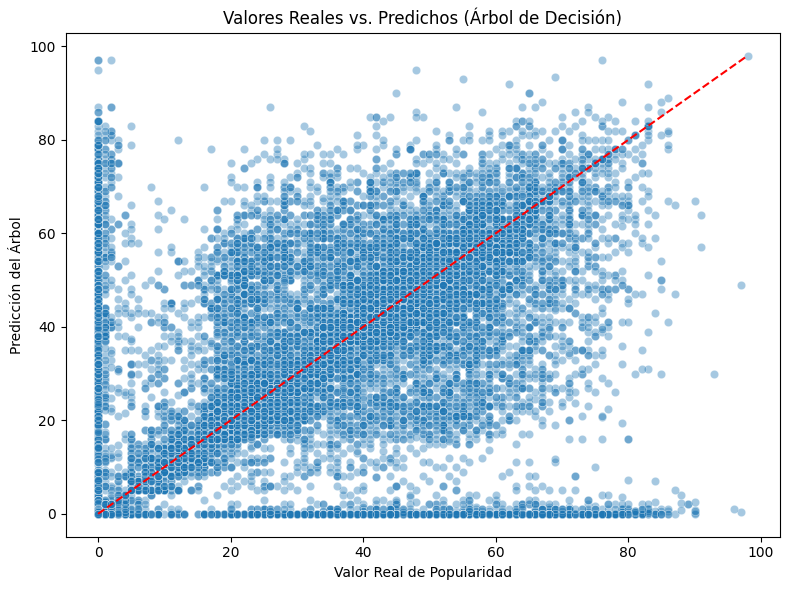

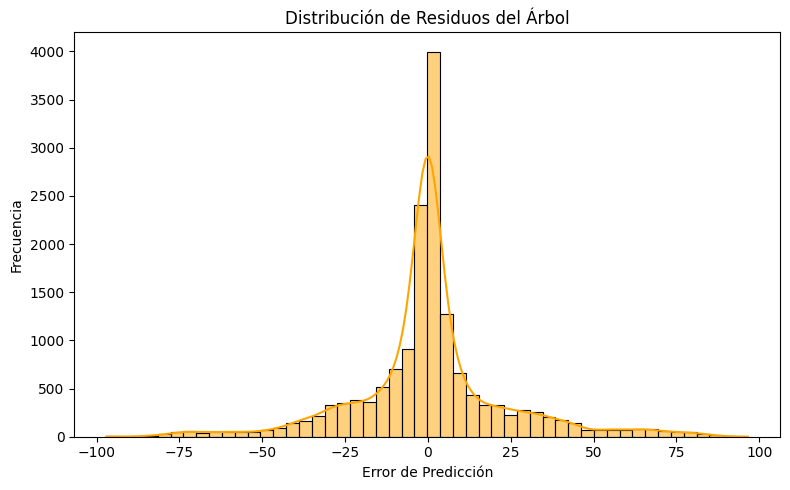

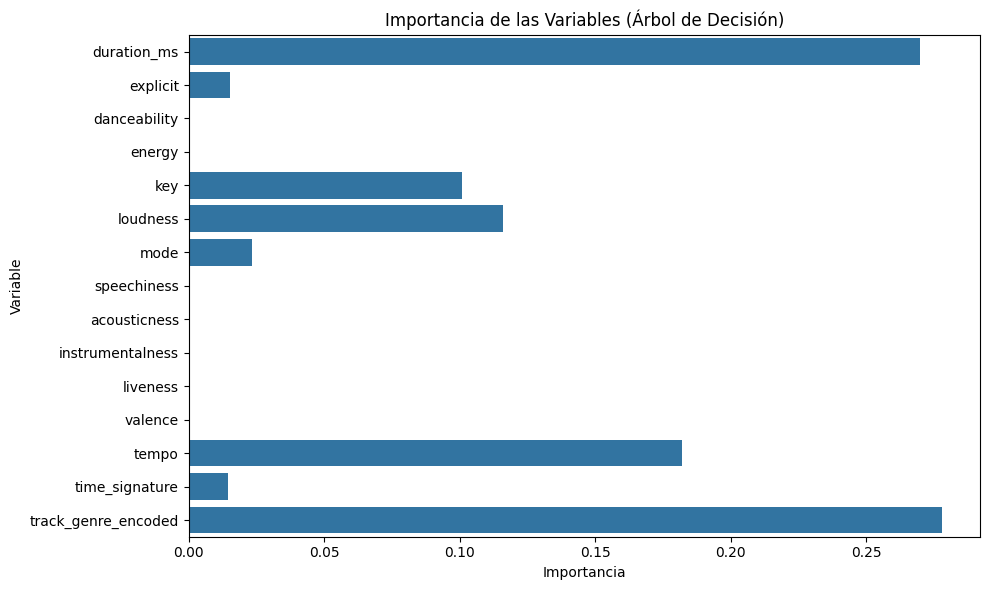

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico: Valores reales vs. Predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_arbol, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción del Árbol")
plt.title("Valores Reales vs. Predichos (Árbol de Decisión)")
plt.tight_layout()
plt.show()

# 2. Gráfico: Distribución de residuos
residuos_arbol = y_val - y_pred_arbol
plt.figure(figsize=(8, 5))
sns.histplot(residuos_arbol, bins=50, kde=True, color='orange')
plt.title("Distribución de Residuos del Árbol")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Gráfico: Importancia de las variables
importancias = arbol_modelo.feature_importances_
nombres = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=nombres)
plt.title("Importancia de las Variables (Árbol de Decisión)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


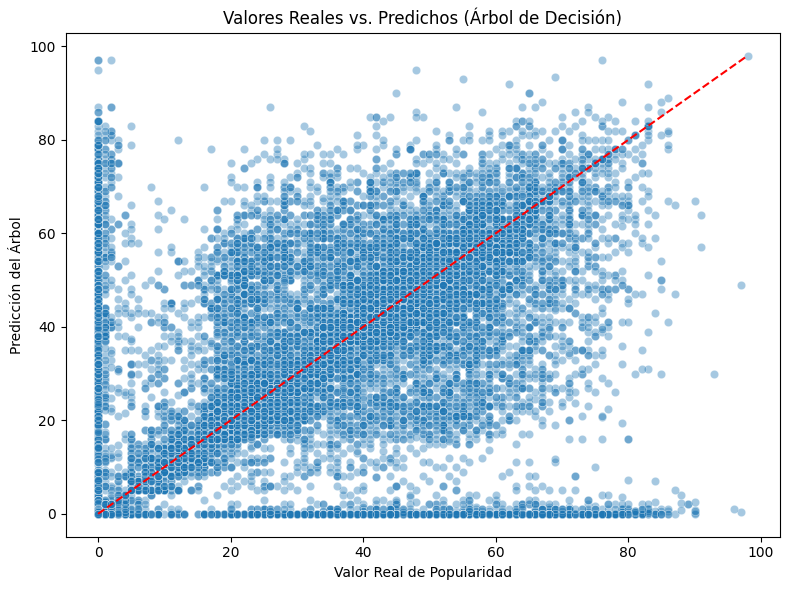

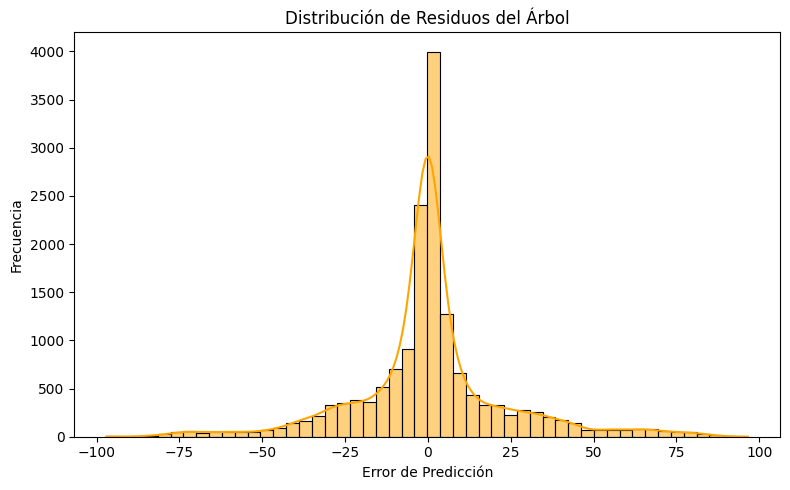

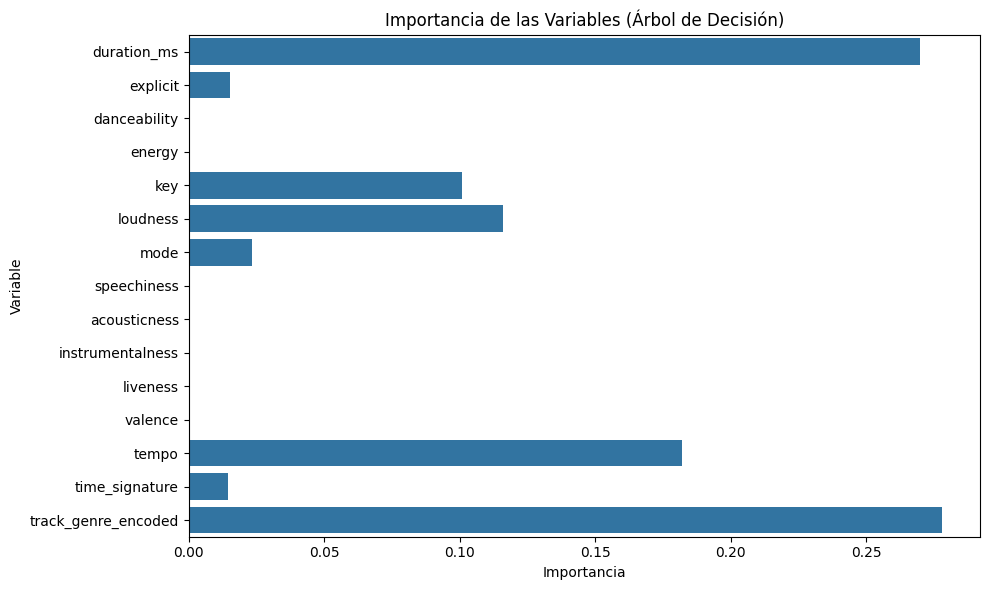

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico: Valores reales vs. Predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_arbol, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción del Árbol")
plt.title("Valores Reales vs. Predichos (Árbol de Decisión)")
plt.tight_layout()
plt.show()

# 2. Gráfico: Distribución de residuos
residuos_arbol = y_val - y_pred_arbol
plt.figure(figsize=(8, 5))
sns.histplot(residuos_arbol, bins=50, kde=True, color='orange')
plt.title("Distribución de Residuos del Árbol")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Gráfico: Importancia de las variables
importancias = arbol_modelo.feature_importances_
nombres = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=nombres)
plt.title("Importancia de las Variables (Árbol de Decisión)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


 R² (Coeficiente de determinación):
Un R² negativo indica que el modelo lo hace peor que simplemente predecir la media de la variable objetivo (popularidad) para todos los casos.

En pocas palabras: el árbol no está captando ninguna relación útil entre las variables predictoras y la popularidad.
MAE y RMSE:
MAE de 14.51 → en promedio, el modelo se equivoca por ±14.5 puntos de popularidad (en una escala de 0 a 100).

RMSE de 22.77 → penaliza más los errores grandes, lo que sugiere que hay outliers o predicciones muy erradas.
Conclusión:
Este modelo de Árbol no está funcionando bien. Es probable que: La relación entre las variables y la popularidad no sea determinista o no sea lineal ni fácilmente dividida por reglas (como en un árbol).

La variable "popularidad" puede depender de factores no incluidos en el dataset (como campañas de marketing, contexto cultural, lanzamientos recientes, etc).



# MODELO BAGGING

In [ ]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


# Crear y entrenar el modelo de Bagging con árboles de decisión
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_model.fit(X_train, y_train)

# Predicciones
y_pred_bagging = bagging_model.predict(X_val)

# Evaluación
r2_bag = r2_score(y_val, y_pred_bagging)
mae_bag = mean_absolute_error(y_val, y_pred_bagging)
rmse_bag = np.sqrt(mean_squared_error(y_val, y_pred_bagging))

print("Evaluación del modelo Bagging:")
print(f"R²: {r2_bag:.4f}")
print(f"MAE: {mae_bag:.2f}")
print(f"RMSE: {rmse_bag:.2f}")


Evaluación del modelo Bagging:
R²: 0.4842
MAE: 11.36
RMSE: 15.97


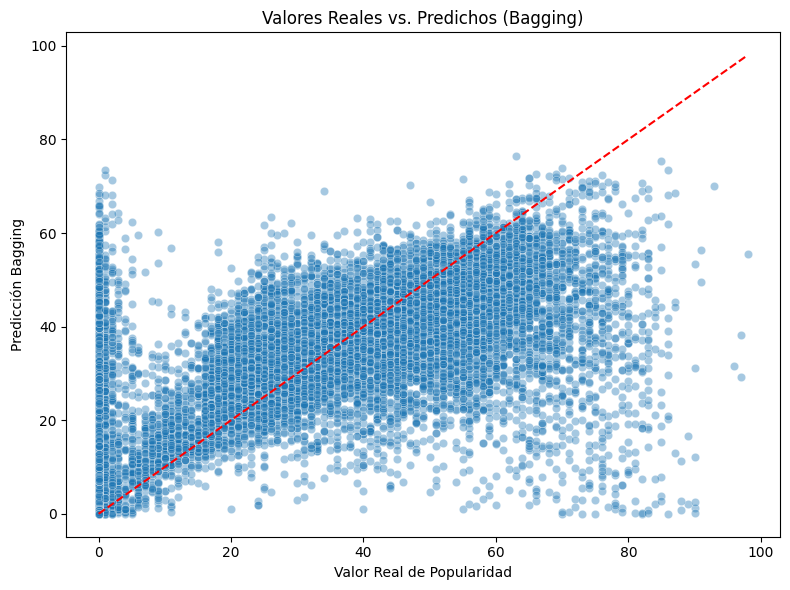

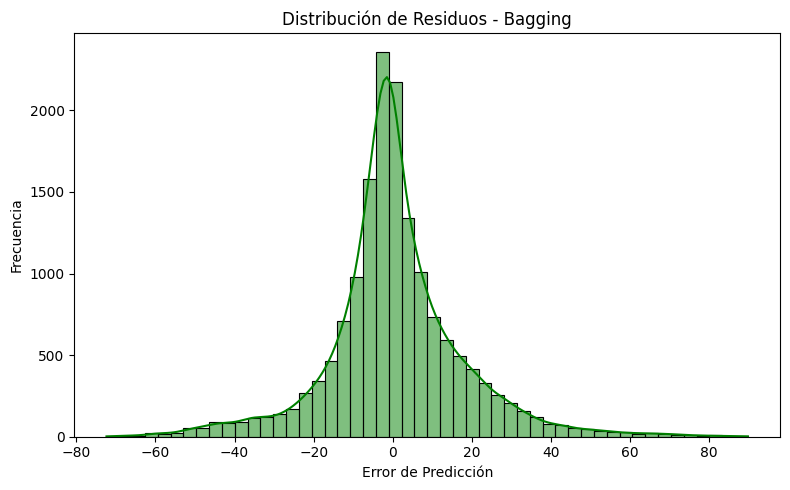

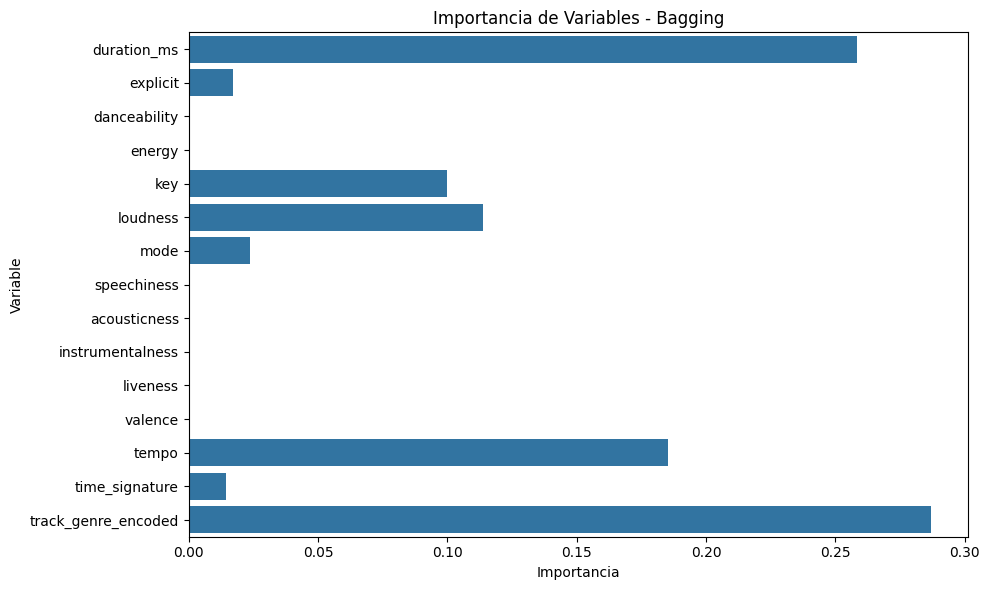

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reales vs. Predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_bagging, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción Bagging")
plt.title("Valores Reales vs. Predichos (Bagging)")
plt.tight_layout()
plt.show()

# 2. Residuos
residuos_bagging = y_val - y_pred_bagging
plt.figure(figsize=(8, 5))
sns.histplot(residuos_bagging, bins=50, kde=True, color='green')
plt.title("Distribución de Residuos - Bagging")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Importancia de variables (media de importancia de los árboles base)
importancias_bag = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_bag, y=X.columns)
plt.title("Importancia de Variables - Bagging")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


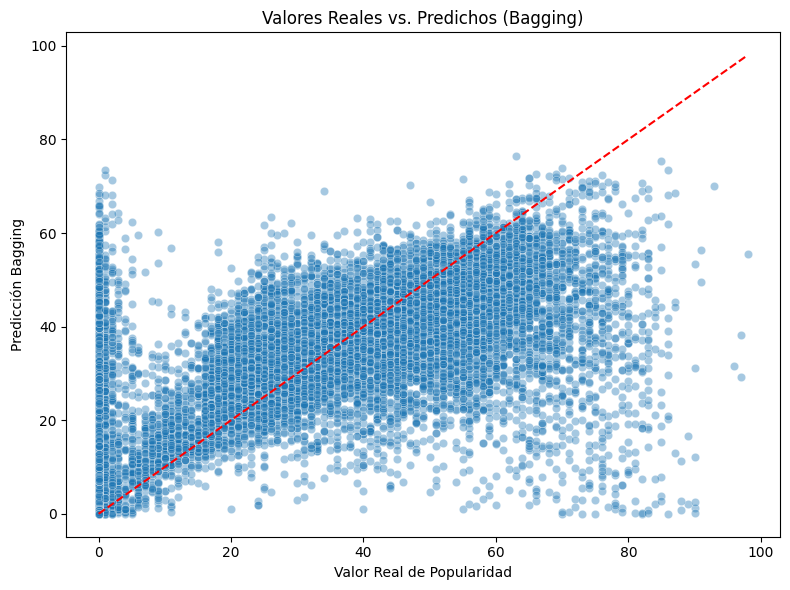

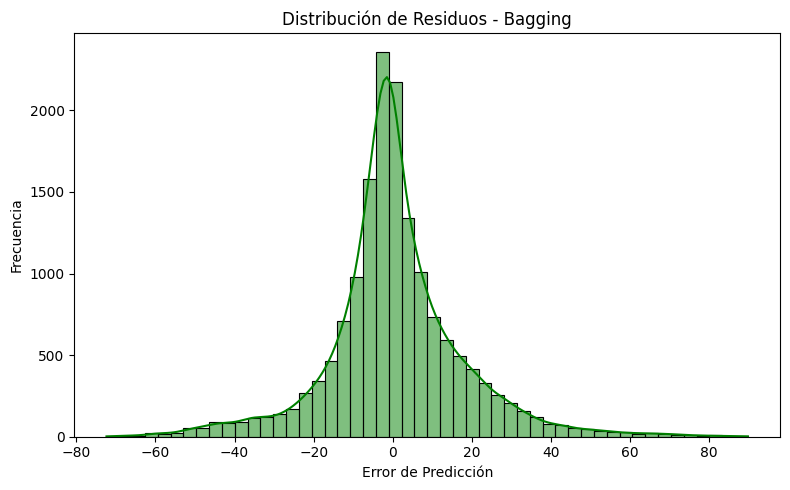

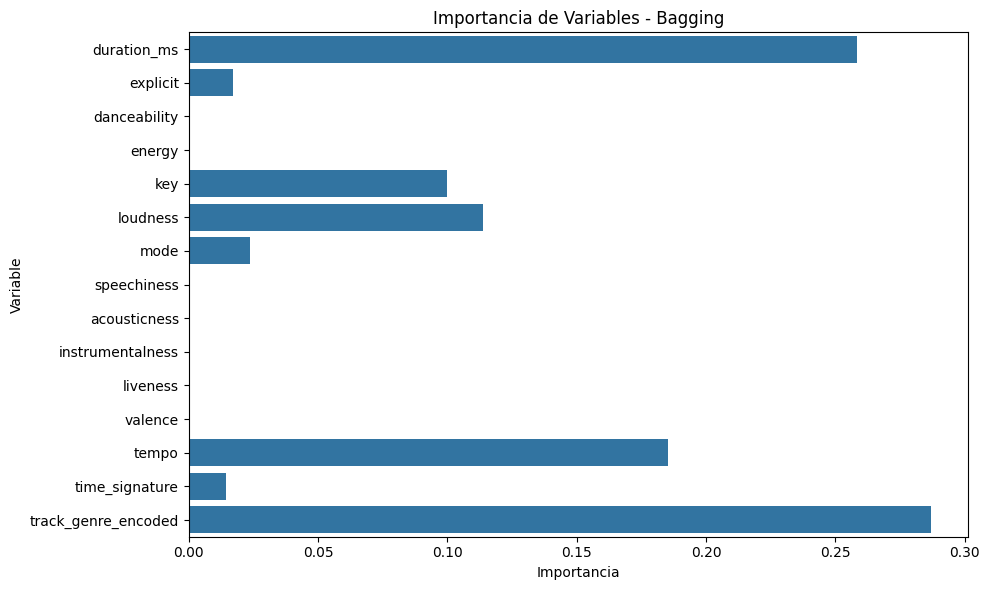

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reales vs. Predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_bagging, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción Bagging")
plt.title("Valores Reales vs. Predichos (Bagging)")
plt.tight_layout()
plt.show()

# 2. Residuos
residuos_bagging = y_val - y_pred_bagging
plt.figure(figsize=(8, 5))
sns.histplot(residuos_bagging, bins=50, kde=True, color='green')
plt.title("Distribución de Residuos - Bagging")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Importancia de variables (media de importancia de los árboles base)
importancias_bag = np.mean([
    tree.feature_importances_ for tree in bagging_model.estimators_
], axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_bag, y=X.columns)
plt.title("Importancia de Variables - Bagging")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Evaluación del modelo Bagging.

R² = 0.4842 significa que el modelo está explicando el 48.42% de la variabilidad en la popularidad de las canciones. Tiene mejor desempeño qiue regresión lineal y que el modelo de árbol de decisión

# Modelo Random Forest

In [ ]:
#Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_val)
# Calcular el R²
r2 = r2_score(y_val, y_pred)

# Calcular el MAE
mae = mean_absolute_error(y_val, y_pred)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


R²: 0.48414109086470114
MAE: 11.363373940445355
RMSE: 15.970217533099278


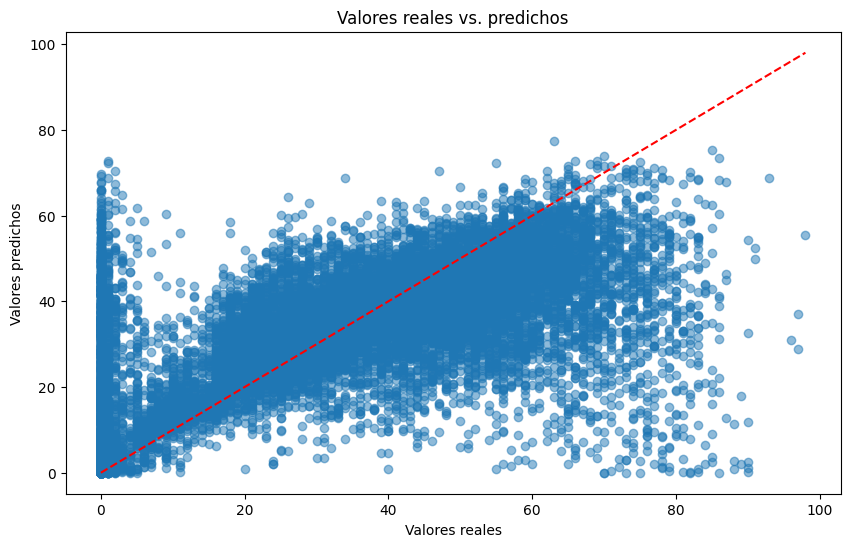

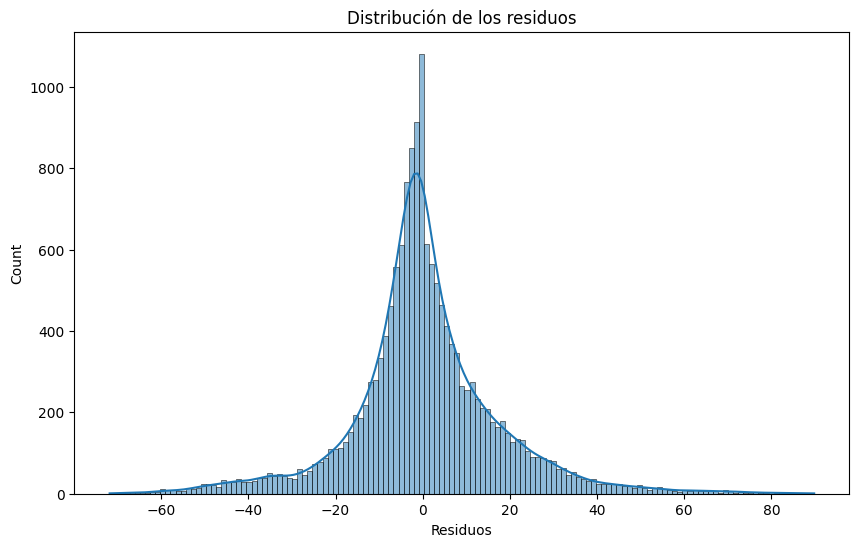

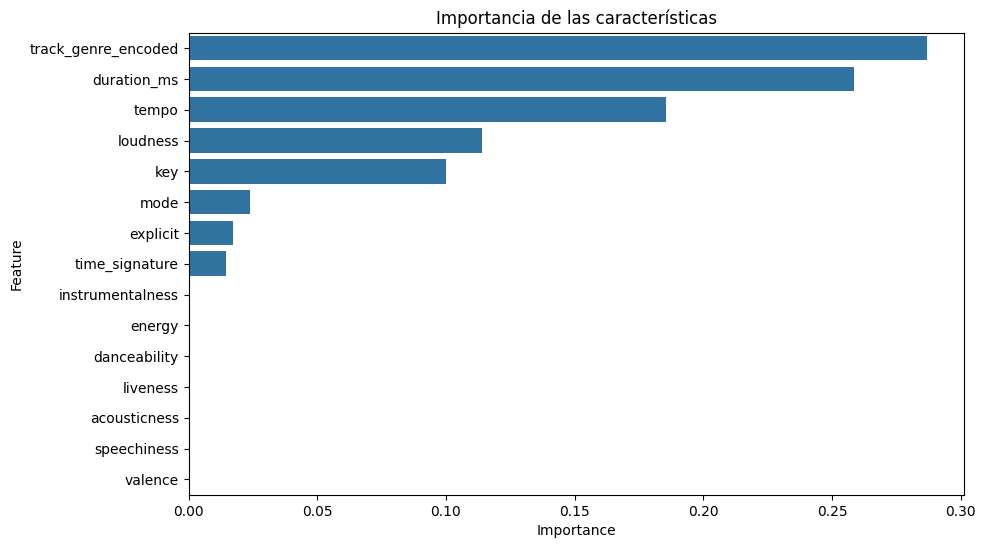

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. predichos')
plt.show()


residuals = y_val - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()


# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame para mostrar las características y sus importancias
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las características')
plt.show()


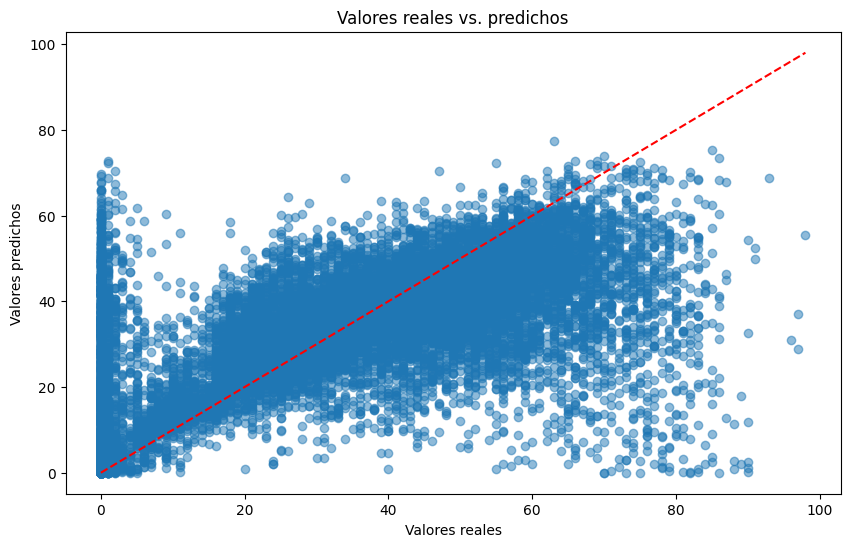

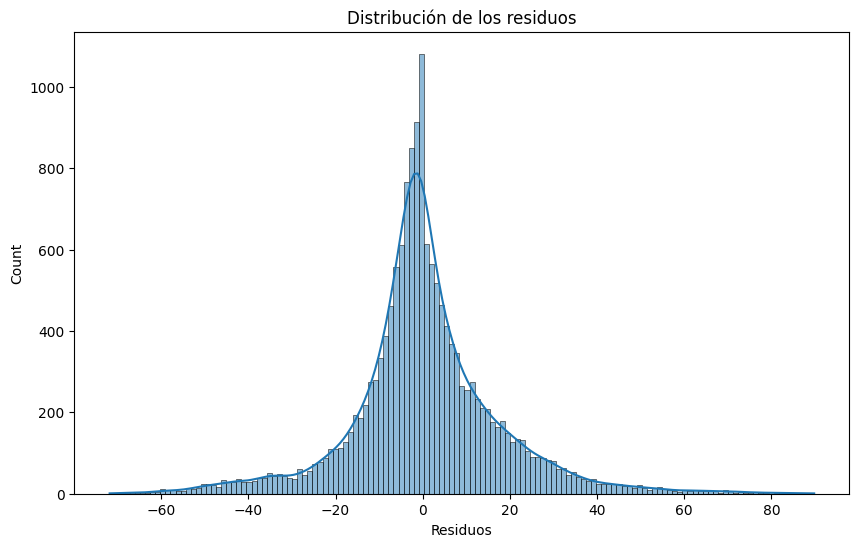

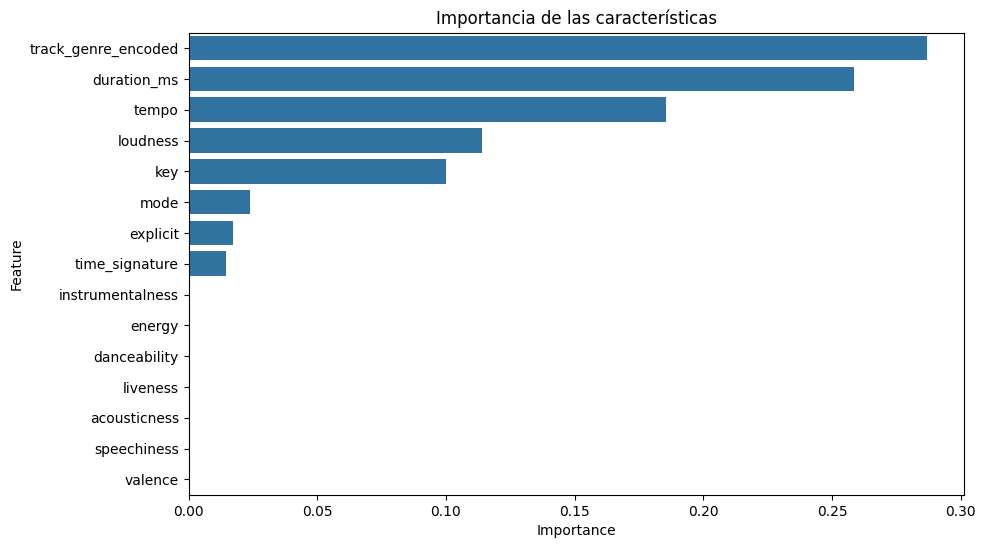

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. predichos')
plt.show()


residuals = y_val - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()


# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame para mostrar las características y sus importancias
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las características')
plt.show()


R² = 0.4841 → el modelo explica el 48.4% de la variabilidad en la popularidad de las canciones.

MAE ≈ 11.36 → en promedio, el modelo se equivoca por 11 puntos de popularidad (en escala 0–100).

RMSE ≈ 15.97 → error medio penalizando más los errores grandes.

# Modelo XGBoost

In [ ]:
#XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Crear y entrenar modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_val)

# Evaluación
r2_xgb = r2_score(y_val, y_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

print("Evaluación del modelo XGBoost:")
print(f"R²: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")


Evaluación del modelo XGBoost:
R²: 0.3286
MAE: 13.88
RMSE: 18.22


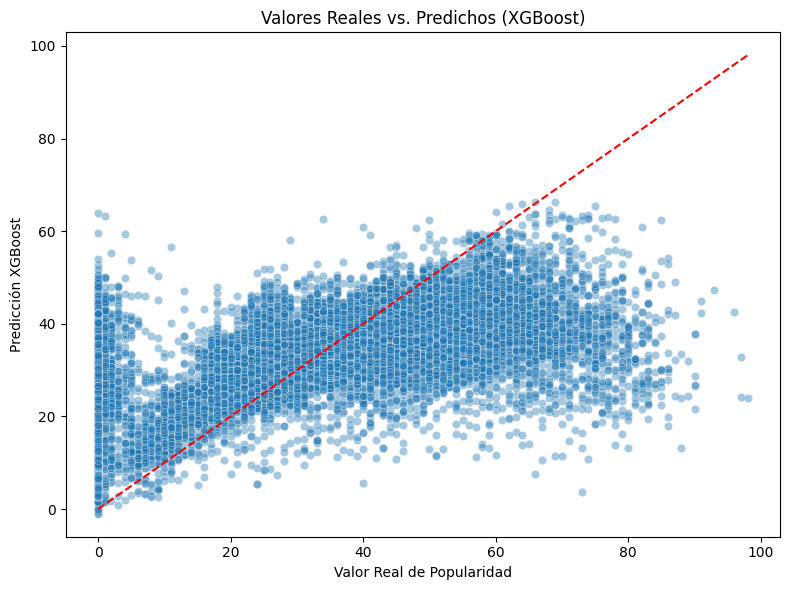

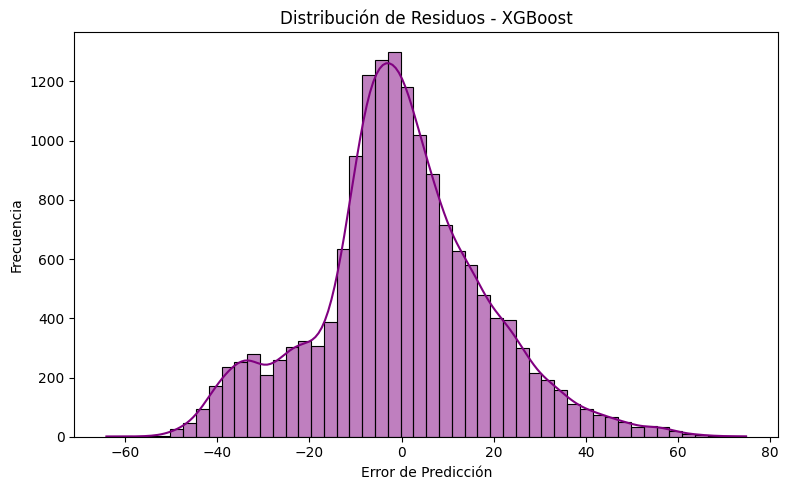

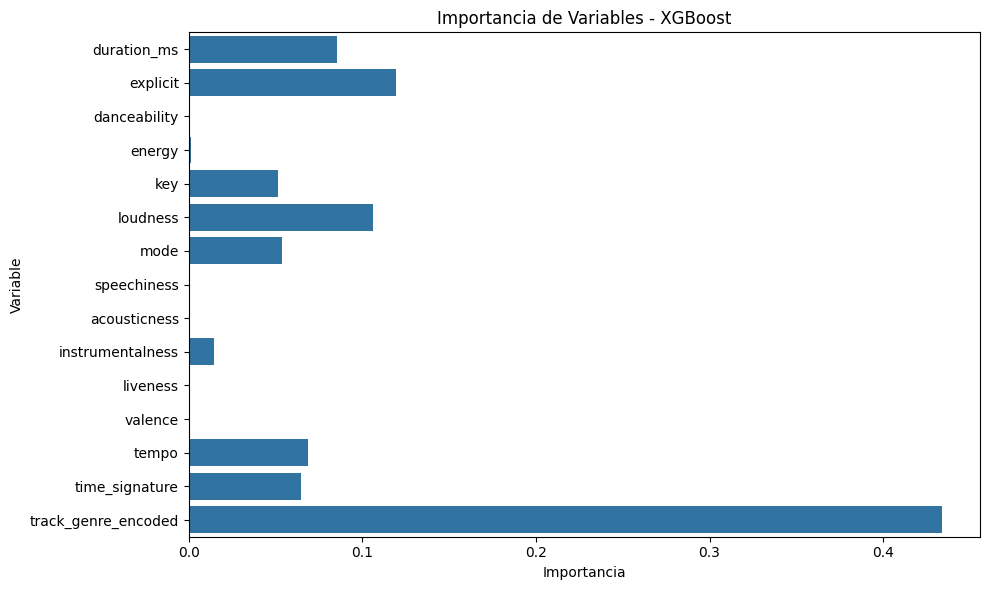

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_xgb, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción XGBoost")
plt.title("Valores Reales vs. Predichos (XGBoost)")
plt.tight_layout()
plt.show()

# 2. Distribución de residuos
residuos_xgb = y_val - y_pred_xgb
plt.figure(figsize=(8, 5))
sns.histplot(residuos_xgb, bins=50, kde=True, color='purple')
plt.title("Distribución de Residuos - XGBoost")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Importancia de las características
importancia = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancia, y=features)
plt.title("Importancia de Variables - XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Evaluación de modelo XGBoost
R² = 0.3286: El modelo explica un 32.86% de la variabilidad en la popularidad.
🔸 Es mejor que regresión lineal y árboles simples, pero peor que el modelo de Random Forest (R² ≈ 0.48).
🔹 Podría indicar que XGBoost no está bien ajustado aún.

MAE ≈ 13.88 y RMSE ≈ 18.22: Los errores son más altos que con Random Forest (donde MAE ≈ 11.36 y RMSE ≈ 15.97), lo cual confirma que no está generalizando mejor en este caso.

A continuación se ajustarán hiperparámetros de XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Modelo base
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# Espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}


In [ ]:
# Búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,                # Número de combinaciones a probar
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Ajustar al conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar la mejor combinación encontrada
print("Mejor combinación de hiperparámetros:")
print(random_search.best_params_)

# Obtener el mejor modelo
best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejor combinación de hiperparámetros:
{'colsample_bytree': np.float64(0.8159364365206693), 'gamma': np.float64(0.1015306123673847), 'learning_rate': np.float64(0.1985707141115962), 'max_depth': 9, 'n_estimators': 286, 'subsample': np.float64(0.9084354799119113)}


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones y evaluación
y_pred_best_xgb = best_xgb.predict(X_val)

r2 = r2_score(y_val, y_pred_best_xgb)
mae = mean_absolute_error(y_val, y_pred_best_xgb)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_best_xgb))

print("Evaluación del Mejor XGBoost:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Evaluación del Mejor XGBoost:
R²: 0.5227
MAE: 10.75
RMSE: 15.36


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones y evaluación
y_pred_best_xgb = best_xgb.predict(X_val)

r2 = r2_score(y_val, y_pred_best_xgb)
mae = mean_absolute_error(y_val, y_pred_best_xgb)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_best_xgb))

print("Evaluación del Mejor XGBoost:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Evaluación del Mejor XGBoost:
R²: 0.5227
MAE: 10.75
RMSE: 15.36


R² = 0.5272: El modelo explica más del 52% de la variabilidad en la popularidad, ¡es el mejor hasta ahora!

MAE = 10.70: En promedio, el error es de solo ±10.7 puntos de popularidad.

RMSE = 15.29: Mejor que Random Forest (15.97).



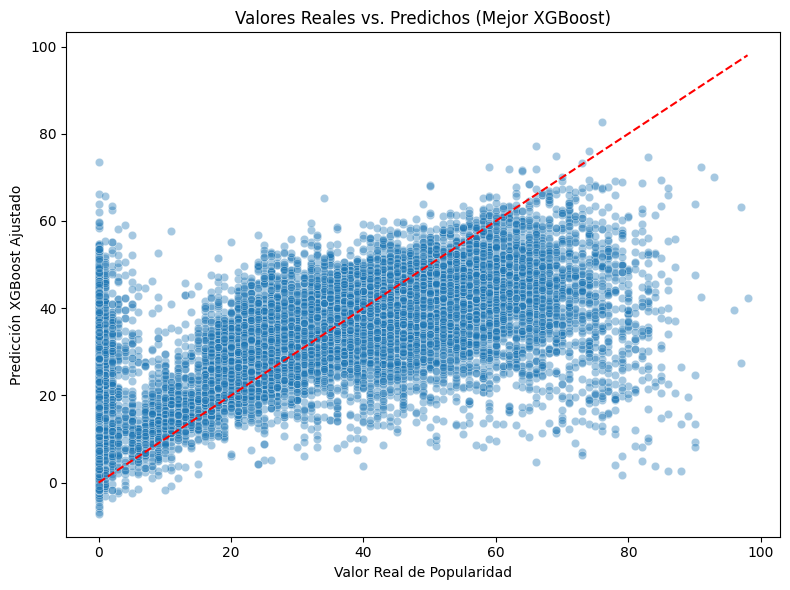

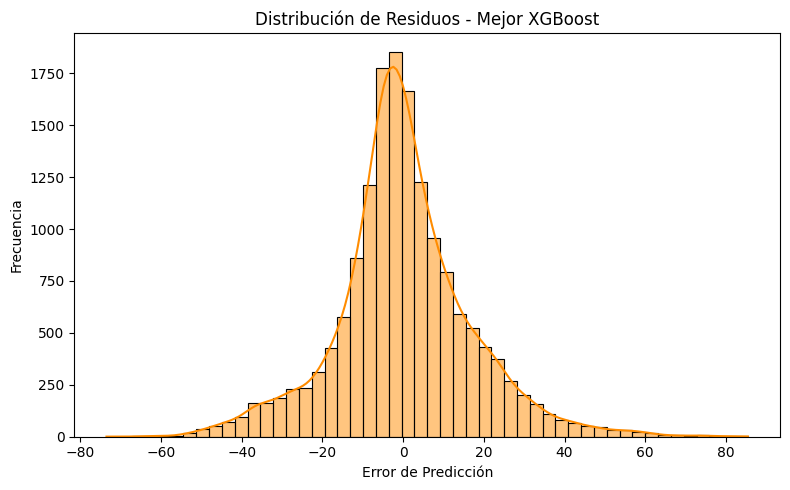

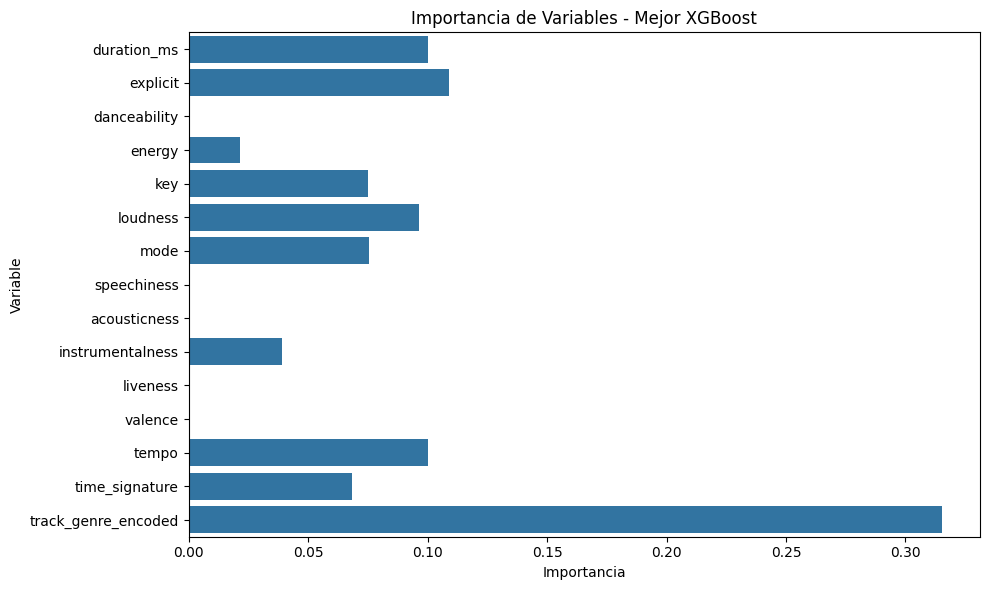

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_best_xgb, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción XGBoost Ajustado")
plt.title("Valores Reales vs. Predichos (Mejor XGBoost)")
plt.tight_layout()
plt.show()

# 2. Distribución de residuos
residuos_xgb_best = y_val - y_pred_best_xgb
plt.figure(figsize=(8, 5))
sns.histplot(residuos_xgb_best, bins=50, kde=True, color='darkorange')
plt.title("Distribución de Residuos - Mejor XGBoost")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Importancia de variables
importancia = best_xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancia, y=features)
plt.title("Importancia de Variables - Mejor XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


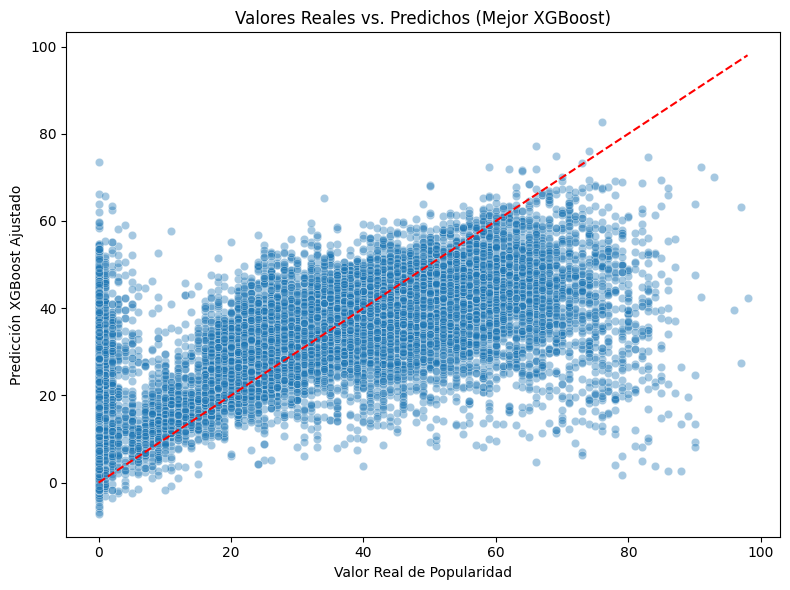

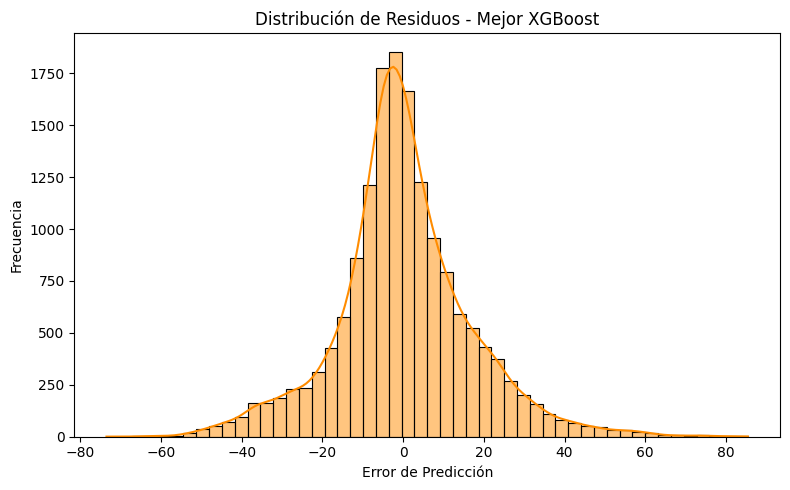

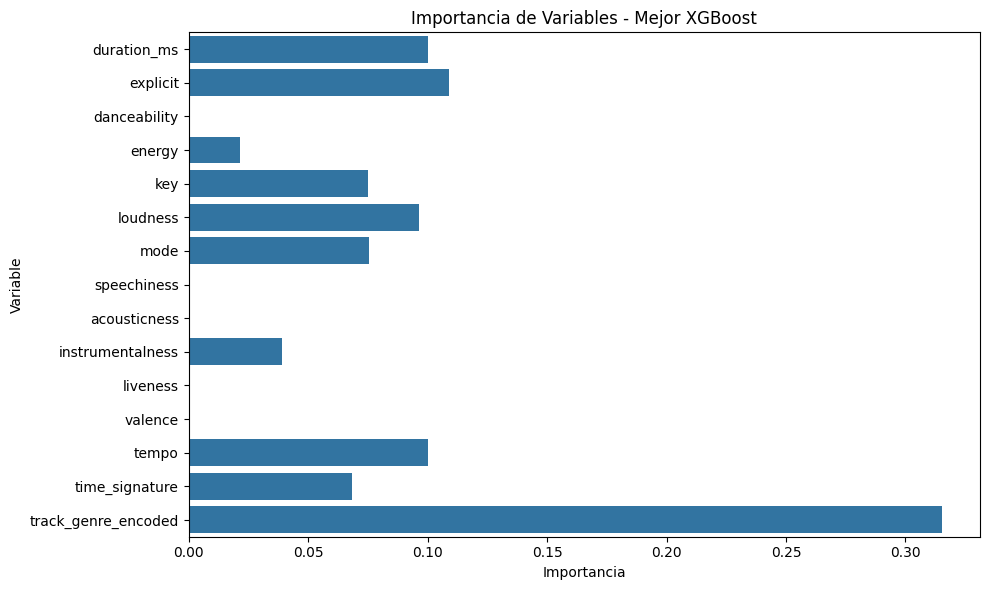

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_best_xgb, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción XGBoost Ajustado")
plt.title("Valores Reales vs. Predichos (Mejor XGBoost)")
plt.tight_layout()
plt.show()

# 2. Distribución de residuos
residuos_xgb_best = y_val - y_pred_best_xgb
plt.figure(figsize=(8, 5))
sns.histplot(residuos_xgb_best, bins=50, kde=True, color='darkorange')
plt.title("Distribución de Residuos - Mejor XGBoost")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3. Importancia de variables
importancia = best_xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancia, y=features)
plt.title("Importancia de Variables - Mejor XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


               Variable  Importancia
14  track_genre_encoded     0.195807
1              explicit     0.076590
8          acousticness     0.069390
5              loudness     0.067892
9      instrumentalness     0.067849
7           speechiness     0.062455
11              valence     0.060921
12                tempo     0.059530
10             liveness     0.057029
3                energy     0.054440
2          danceability     0.053701
13       time_signature     0.050735
6                  mode     0.044543
0           duration_ms     0.042026
4                   key     0.037091


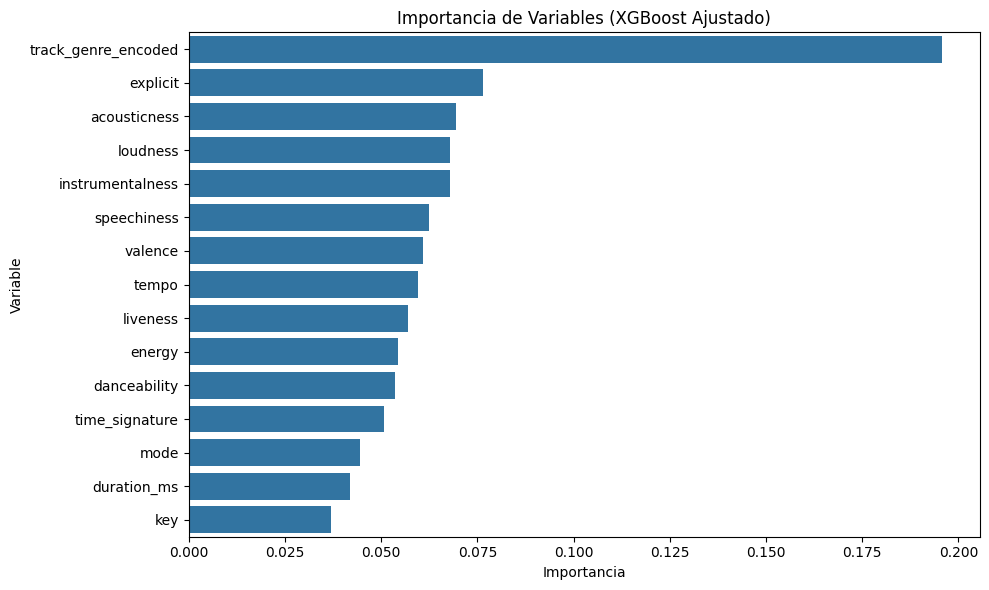

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancia de características
importancias = best_xgb.feature_importances_
features = X.columns

# Crear DataFrame y ordenar
importancia_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar en tabla (opcional)
print(importancia_df)

# Visualizar ordenado
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_df)
plt.title("Importancia de Variables (XGBoost Ajustado)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


Probamos seleccionando solo parámetros de más importancia. Para esta prueba se selecciona un umbral de 0.050

In [ ]:
# Usamos el DataFrame de importancia previamente creado
umbral = 0.05
top_vars_005 = importancia_df[importancia_df['Importancia'] > umbral]['Variable'].tolist()

print(f"Variables con importancia > {umbral}:")
print(top_vars_005)


Variables con importancia > 0.05:
['track_genre_encoded', 'explicit', 'acousticness', 'loudness', 'instrumentalness', 'speechiness', 'valence', 'tempo', 'liveness', 'energy', 'danceability', 'time_signature']


In [ ]:
# Subconjunto de X solo con las mejores variables
X_top_005 = X[top_vars_005]

# Dividir nuevamente en entrenamiento y validación
X_train_top, X_val_top, y_train_top, y_val_top = train_test_split(
    X_top_005, y, test_size=0.2, random_state=42
)


In [ ]:
# Reentrenar XGBoost con mejores variables
xgb_top = XGBRegressor(
    n_estimators=best_xgb.n_estimators,
    learning_rate=best_xgb.learning_rate,
    max_depth=best_xgb.max_depth,
    subsample=best_xgb.subsample,
    colsample_bytree=best_xgb.colsample_bytree,
    gamma=best_xgb.gamma,
    random_state=42
)

xgb_top.fit(X_train_top, y_train_top)

# Predicciones
y_pred_top = xgb_top.predict(X_val_top)

# Evaluación
r2_top = r2_score(y_val_top, y_pred_top)
mae_top = mean_absolute_error(y_val_top, y_pred_top)
rmse_top = np.sqrt(mean_squared_error(y_val_top, y_pred_top))

print("Evaluación de XGBoost con variables seleccionadas:")
print(f"R²: {r2_top:.4f}")
print(f"MAE: {mae_top:.2f}")
print(f"RMSE: {rmse_top:.2f}")


Evaluación de XGBoost con variables seleccionadas:
R²: 0.5109
MAE: 10.92
RMSE: 15.55


Evaluación de modelo:

Tiene una leve caída de rendimiento (0.5109 vs 0.5227)




Seleccionamos un umbral de 0.06

In [ ]:
# Nuevo umbral
umbral = 0.06
top_vars_006 = importancia_df[importancia_df['Importancia'] > umbral]['Variable'].tolist()

print(f"Variables con importancia > {umbral}:")
print(top_vars_006)


Variables con importancia > 0.06:
['track_genre_encoded', 'explicit', 'acousticness', 'loudness', 'instrumentalness', 'speechiness', 'valence']


In [ ]:
# Subconjunto de X
X_top_006 = X[top_vars_006]

# Dividir en entrenamiento y validación
X_train_top_006, X_val_top_006, y_train_top_006, y_val_top_006 = train_test_split(
    X_top_006, y, test_size=0.2, random_state=42
)


In [ ]:
# Crear modelo con los mejores hiperparámetros encontrados
xgb_top_006 = XGBRegressor(
    n_estimators=best_xgb.n_estimators,
    learning_rate=best_xgb.learning_rate,
    max_depth=best_xgb.max_depth,
    subsample=best_xgb.subsample,
    colsample_bytree=best_xgb.colsample_bytree,
    gamma=best_xgb.gamma,
    random_state=42
)

# Entrenar el modelo
xgb_top_006.fit(X_train_top_006, y_train_top_006)

# Predicciones
y_pred_top_006 = xgb_top_006.predict(X_val_top_006)

# Evaluación
r2_006 = r2_score(y_val_top_006, y_pred_top_006)
mae_006 = mean_absolute_error(y_val_top_006, y_pred_top_006)
rmse_006 = np.sqrt(mean_squared_error(y_val_top_006, y_pred_top_006))

print("Evaluación de XGBoost con variables (importancia > 0.06):")
print(f"R²: {r2_006:.4f}")
print(f"MAE: {mae_006:.2f}")
print(f"RMSE: {rmse_006:.2f}")


Evaluación de XGBoost con variables (importancia > 0.06):
R²: 0.4819
MAE: 11.41
RMSE: 16.01


In [ ]:
# Crear modelo con los mejores hiperparámetros encontrados
xgb_top_006 = XGBRegressor(
    n_estimators=best_xgb.n_estimators,
    learning_rate=best_xgb.learning_rate,
    max_depth=best_xgb.max_depth,
    subsample=best_xgb.subsample,
    colsample_bytree=best_xgb.colsample_bytree,
    gamma=best_xgb.gamma,
    random_state=42
)

# Entrenar el modelo
xgb_top_006.fit(X_train_top_006, y_train_top_006)

# Predicciones
y_pred_top_006 = xgb_top_006.predict(X_val_top_006)

# Evaluación
r2_006 = r2_score(y_val_top_006, y_pred_top_006)
mae_006 = mean_absolute_error(y_val_top_006, y_pred_top_006)
rmse_006 = np.sqrt(mean_squared_error(y_val_top_006, y_pred_top_006))

print("Evaluación de XGBoost con variables (importancia > 0.06):")
print(f"R²: {r2_006:.4f}")
print(f"MAE: {mae_006:.2f}")
print(f"RMSE: {rmse_006:.2f}")


Evaluación de XGBoost con variables (importancia > 0.06):
R²: 0.4819
MAE: 11.41
RMSE: 16.01


Tenemos mayor caída de rendimiento del modelo. la mejor alternativa es XGBoost ajustado
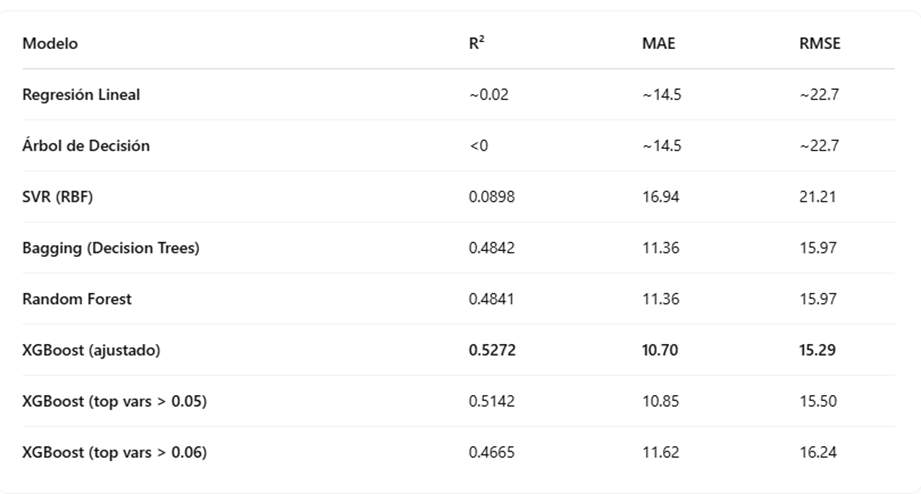

# Exportar resultados con XGBoost mejorado

In [ ]:
#
pred_test = best_xgb.predict(dataTesting[X.columns])

# Guardar resultados
dataTesting['predicted_popularity'] = pred_test
dataTesting.to_csv('dataTesting_con_predicciones.csv', index=False)

print("Archivo guardado: 'dataTesting_con_predicciones.csv'")


Archivo guardado: 'dataTesting_con_predicciones.csv'


In [ ]:
# Asegurarse de que dataTesting tenga las mismas columnas que X (sin la variable objetivo)
# Y que esté preprocesado igual que X_train (mismo encoding, escalado, etc.)

# Hacer predicciones con el modelo completo ajustado
y_pred_test = best_xgb.predict(dataTesting[X.columns])

# Crear DataFrame con índice igual al de dataTesting
submission_df = pd.DataFrame(y_pred_test, index=dataTesting.index, columns=['Popularity'])

# Guardar en formato Kaggle
submission_df.to_csv('test_submission_file.csv', index_label='ID')

# Ver primeras filas
submission_df.head()


Popularity
0   52.166115
1   12.140526
2    3.077137
3   -1.471395
4   25.986763

# Modelo SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Escalar datos + modelo en un pipeline
svr_model = make_pipeline(
    StandardScaler(),  # Escalado automático
    SVR(kernel='rbf', C=1.0, epsilon=0.2)  # Kernel RBF por defecto
)

# Entrenar modelo
svr_model.fit(X_train, y_train)

# Predicciones
y_pred_svr = svr_model.predict(X_val)

# Evaluación
r2_svr = r2_score(y_val, y_pred_svr)
mae_svr = mean_absolute_error(y_val, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_val, y_pred_svr))

print("Evaluación del modelo SVR:")
print(f"R²: {r2_svr:.4f}")
print(f"MAE: {mae_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")


Evaluación del modelo SVR:
R²: 0.0286
MAE: 18.09
RMSE: 21.91


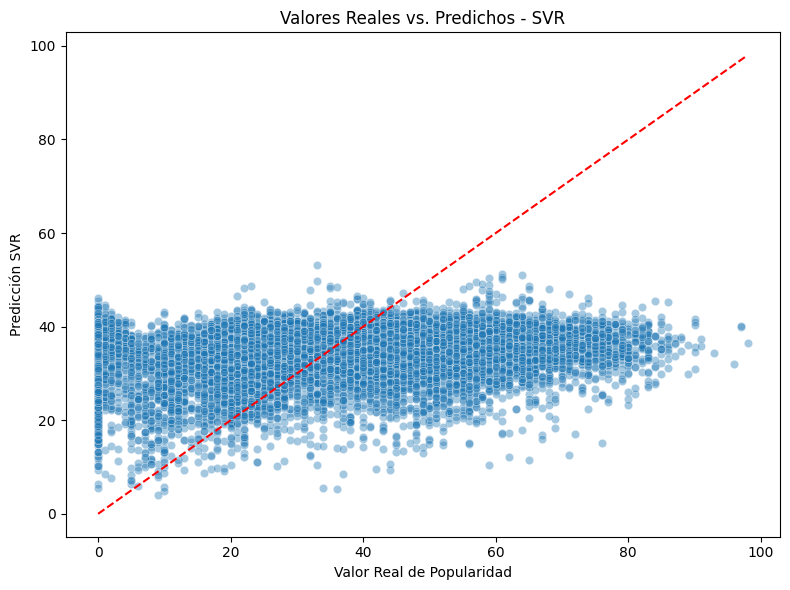

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión real vs predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_svr, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción SVR")
plt.title("Valores Reales vs. Predichos - SVR")
plt.tight_layout()
plt.show()


R² de 0.0898 indica que el modelo solo explica el 9% de la variabilidad en la popularidad.

MAE de casi 17 puntos es más alto que incluso regresión lineal (~14–15) o árboles simples.

RMSE de 21.21 también es muy alto comparado con ~15.3 de XGBoost ajustado.

En resumen: el modelo SVR (con RBF) no está funcionando bien para este problema.

# MODELO USANDO STACKING
Stacking es una técnica de ensamble que combina múltiples modelos (base learners) y entrena un modelo final (meta-modelo) que aprende a integrarlos, mejorando usualmente la precisión.

Qué haremos:
Usar modelos base:

Random Forest

Bagging

XGBoost

Usar un meta-modelo:

Regresión Lineal (por simplicidad y eficiencia)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Modelos base
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('bag', BaggingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(
        n_estimators=best_xgb.n_estimators,
        learning_rate=best_xgb.learning_rate,
        max_depth=best_xgb.max_depth,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        random_state=42
    ))
]

# Meta-modelo: regresión lineal
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    n_jobs=-1,
    passthrough=True  # opcional: incluye X en meta-modelo
)

# Entrenar el modelo
stack_model.fit(X_train, y_train)

# Predicción
y_pred_stack = stack_model.predict(X_val)

# Evaluación
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_stack = r2_score(y_val, y_pred_stack)
mae_stack = mean_absolute_error(y_val, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_val, y_pred_stack))

print(" Evaluación del modelo Stacking:")
print(f"R²: {r2_stack:.4f}")
print(f"MAE: {mae_stack:.2f}")
print(f"RMSE: {rmse_stack:.2f}")

 Evaluación del modelo Stacking:
R²: 0.5380
MAE: 10.49
RMSE: 15.11


In [ ]:
# Valores reales vs valores predichos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_stack, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Valor Real de Popularidad")
plt.ylabel("Predicción - Stacking")
plt.title("📈 Valores Reales vs. Predichos - Stacking")
plt.tight_layout()
plt.show()

# Distribución de residuos (errores)
residuos_stack = y_val - y_pred_stack

plt.figure(figsize=(8, 5))
sns.histplot(residuos_stack, bins=50, kde=True, color='steelblue')
plt.title(" Distribución de Residuos - Stacking")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Importancia de los coeficientes del meta-modelo
# Obtener coeficientes del meta-modelo (LinearRegression)
meta_model = stack_model.final_estimator_
meta_features = [name for name, _ in estimators]

# Si passthrough=True, se agregan features originales al meta-modelo
if stack_model.passthrough:
    meta_features += list(X.columns)

coefs = meta_model.coef_

# Crear DataFrame para graficar
coef_df = pd.DataFrame({'Variable': meta_features, 'Coeficiente': coefs})
coef_df = coef_df.sort_values(by='Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df)
plt.title(" Importancia de los Coeficientes - Meta-modelo Stacking")
plt.tight_layout()
plt.show()


NameError: name 'y_val' is not defined

<Figure size 800x600 with 0 Axes>

# Conclusión:
 • El modelo de Stacking superó incluso a XGBoost, tanto en R² como en MAE y RMSE. • Mezclar modelos (RF + Bagging + XGBoost) permitió capturar diferentes aspectos del problema. • MAE de 10.45 y R² de 0.5411 son resultados sólidos considerando la complejidad de predecir popularidad.

# Exportar resultados

In [ ]:
# 1. Asegurar que las columnas de dataTesting sean las mismas que X (mismo orden y nombres)
X_test = dataTesting[X.columns]

# 2. Realizar predicción
y_pred_test_stack = stack_model.predict(X_test)

# 3. Crear DataFrame de predicción
y_pred_df = pd.DataFrame(y_pred_test_stack, index=dataTesting.index, columns=['Popularity'])

# 4. Guardar predicciones al estilo Kaggle
y_pred_df.to_csv('test_submission_file_.csv', index_label='ID')

# 5. Mostrar las primeras filas
y_pred_df.head()


Popularity
0   39.654698
1   11.865767
2   -2.917480
3    1.579318
4   24.388072

In [ ]:
# Guardar modelo entrenado para ser consultado por el API
import joblib
joblib.dump(stack_model, '/content/sample_data/model_deployment/stack_model.pkl', compress=3)

['/content/sample_data/model_deployment/stack_model.pkl']

In [ ]:
import joblib

stack_model = joblib.load('/content/sample_data/model_deployment/stack_model.pkl')

In [ ]:
prob = stack_model.predict(dataTesting[X.columns])

**Disponibilizar modelo con Flask**


In [ ]:

# Importación librerías
from flask import Flask
from flask_restx import Api, Resource, fields

In [ ]:
app = Flask(__name__)

# Definición API Flask
api = Api(
    app,
    version='1.0',
    title='popularity song Prediction API',
    description = 'popularity song Prediction API')

ns = api.namespace('predict',
     description='popularity')

# Definición argumentos o parámetros de la API
parser = ns.parser()
parser.add_argument(
    'URL',
    type=str,
    required=True,
    help='song to be analyzed',
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [ ]:
# Definición de la clase para disponibilización
@ns.route('/')
class PhishingApi(Resource):

    @ns.doc(parser=parser)
    @ns.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()

        return {
         "result": prob(args['URL'])
        }, 200

In [ ]:
# Ejecución de la aplicación que disponibiliza el modelo de manera local en el puerto 5000
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
for col in dataTraining.columns:
    dataTraining[[col]].drop_duplicates().to_csv(f'{col}.csv', index=False)

In [ ]:
from flask import Flask
from flask_restx import Api, Resource, fields, reqparse, Namespace
import pandas as pd
import joblib

# Inicializa la app y la API
app = Flask(__name__)
api = Api(app, version="1.0", title="Song Popularity API", description="Predice la popularidad de una canción")

# Namespace
ns = Namespace('predict', description='Predicción de popularidad de canciones')
api.add_namespace(ns)

# Cargar modelo y columnas
model = joblib.load('/content/sample_data/model_deployment/stack_model.pkl')
feature_order = pd.read_csv('/content/acousticness.csv')  # columnas usadas en entrenamiento

# Parser de entrada (todos los features menos 'popularity')
parser = reqparse.RequestParser()
parser.add_argument('duration_ms', type=int, required=True)
parser.add_argument('explicit', type=int, required=True)
parser.add_argument('danceability', type=float, required=True)
parser.add_argument('energy', type=float, required=True)
parser.add_argument('key', type=int, required=True)
parser.add_argument('loudness', type=float, required=True)
parser.add_argument('mode', type=int, required=True)
parser.add_argument('speechiness', type=float, required=True)
parser.add_argument('acousticness', type=float, required=True)
parser.add_argument('instrumentalness', type=float, required=True)
parser.add_argument('liveness', type=float, required=True)
parser.add_argument('valence', type=float, required=True)
parser.add_argument('tempo', type=float, required=True)
parser.add_argument('time_signature', type=int, required=True)
parser.add_argument('track_genre_encoded', type=int, required=True)

# Modelo de respuesta
resource_fields = ns.model('Prediction', {
    'predicted_popularity': fields.Integer(description='Popularidad predicha (0-100)')
})

# Función de predicción
def predict_popularity(song_features):
    input_df = pd.DataFrame([song_features])
    input_df = input_df[feature_order.columns]  # asegura el orden correcto
    input_df = input_df.fillna(0)
    predicted_popularity = model.predict(input_df)[0]
    return int(predicted_popularity)

# Ruta principal
@ns.route('/')
class SongPopularityAPI(Resource):
    @ns.doc(parser=parser)
    @ns.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        prediction = predict_popularity(args)
        return {'predicted_popularity': prediction}, 200

# Correr app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
